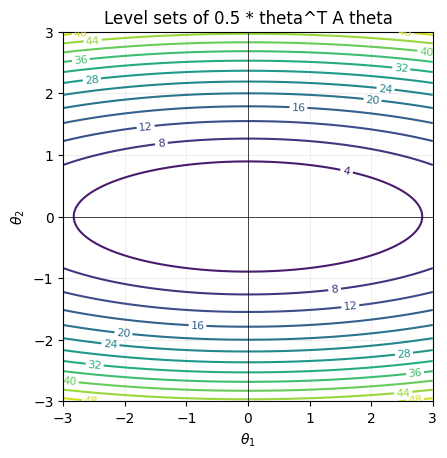

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def quad_levelsets(A, xlim=(-3,3), ylim=(-3,3), ngrid=400, ncontours=12, title=None):
    xs = np.linspace(xlim[0], xlim[1], ngrid)
    ys = np.linspace(ylim[0], ylim[1], ngrid)
    X, Y = np.meshgrid(xs, ys)
    Z = 0.5*(A[0,0]*X**2 + 2*A[0,1]*X*Y + A[1,1]*Y**2)  # theta^T A theta, left-multiplied convention
    cs = plt.contour(X, Y, Z, levels=ncontours)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.axhline(0, lw=0.5, color='k')
    plt.axvline(0, lw=0.5, color='k')
    plt.gca().set_aspect('equal', 'box')
    if title:
        plt.title(title)
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.grid(alpha=0.2)
    plt.show()

# Example: ill-conditioned ellipse
# the more strecthed the ellipsis is, the more difficult the convergence is
A = np.diag([1.0, 10.0])  # lambda1 << lambda2
quad_levelsets(A, title='Level sets of 0.5 * theta^T A theta')

In [10]:
#Try to implement the Gd algorithm on the following functions:
#l1(theta) = theta_1^2 + theta_2^2
#l2(theta) = 10theta_1^2 + theta_2^2
#and compare against GD with backtracking
#set theta0 =[1,1] for both
def l1(theta):
    return  (theta[0])**2 + (theta[1])**2
def l2(theta):
    return 10*(theta[0])**2 + (theta[1])**2
def grad_l1(theta):
    return np.array([2*theta[0], 2*theta[1]])
def grad_l2(theta):
    return np.array([20*theta[0], 2*theta[1]])

def GD(l,grad_l, theta_0, eta, maxit, tolL, toltheta):
    for k in range(maxit):
        theta = theta_0 - eta*grad_l(theta_0)
        if (np.linalg.norm(grad_l(theta)) < tolL) or (np.linalg.norm(theta - theta_0) < toltheta):
            break
            
        theta_0 = theta
    return theta, k

theta0 = np.array([1.0,1.0])
theta_sol1, it1 = GD(l1, grad_l1, theta0, eta = 0.2, maxit = 100, tolL = 1e-6, toltheta = 1e-6)

print("Solution for l1: ", theta_sol1, " in ", it1, " iterations")

theta_sol2, it2 = GD(l2, grad_l2, theta0, eta = 0.01, maxit = 500, tolL = 1e-10, toltheta = 1e-10)
print("Solution for l2: ", theta_sol2, " in ", it2, " iterations")

Solution for l1:  [1.02349037e-06 1.02349037e-06]  in  26  iterations
Solution for l2:  [3.50746621e-49 4.10239851e-05]  in  499  iterations


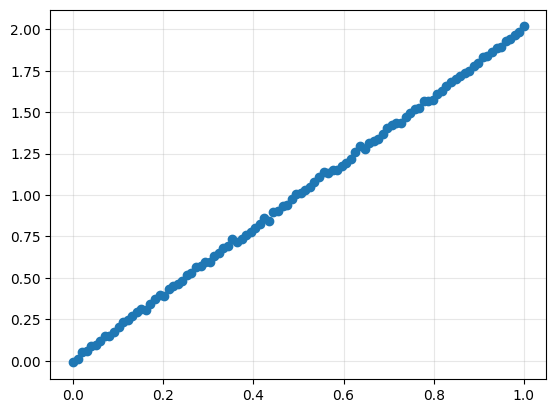

Solution with GD:  [0.97850186 0.01166202]  in  199  iterations


In [ ]:
#stochastic gradient descent
import numpy as np
import matplotlib.pyplot as plt
#step 1: generate dataset
#Y = 2X + e
 
X = np.linspace(0,1,100)
Y = 2*X + np.random.normal(0, 0.01, size = X.shape)

#visualize it
plt.plot(X,Y,'o')
plt.grid(alpha =0.3)
plt.show()

#step 2: define loss function
def l(Theta, X, Y):
    #l(T,X,y) = 1/N sum((Theta[0] + Theta[1]*X_i - Y*i)^2)
    return np.mean(np.square(Theta[0] + Theta[1]*X - Y))
   
def grad_l(Theta, X, Y):
    N = len(X)
    g1 = 2*np.mean(Theta[0] + Theta[1]*X - Y)
    g2 = 2/N*np.mean((Theta[0] + Theta[1]*X - Y)*X)

    return np.array([g1, g2])

def GD(l,grad_l,X,Y, theta_0, eta, maxit, tolL, toltheta):
    for k in range(maxit):
        theta = theta_0 - eta*grad_l(theta_0,X,Y)
        if (np.linalg.norm(grad_l(theta,X,Y)) < tolL) or (np.linalg.norm(theta - theta_0) < toltheta):
            break
            
        theta_0 = theta
    return theta, k

theta_GD, k_GD = GD(l, grad_l, X, Y, theta_0 = np.array([0.0,0.0]), eta = 0.1, maxit = 200, tolL = 1e-10, toltheta = 1e-10)
print("Solution with GD: ", theta_GD, " in ", k_GD, " iterations")

In [ ]:
import random

def SGD(l,grad_l, X, Y,Theta0, lr=1e-2, batch_size=32, epochs =10):
    #l: loss function, grad_l: ...
    #lr: eta
    Theta = Theta0
    for epoch in range(epochs):

        #step 4 = restart data and shuffle
        shuffle_idx = np.arange(len(X))
        np.random.shuffle(shuffle_idx)

        X = X[shuffle_idx]
        Y = Y[shuffle_idx]

        n_batches= len(X)//batch_size

        for batch in range (n_batches):
            #step 1 = randomly sample a batch
            Xb = X[batch * batch_size : (batch+1)*batch_size]
            Yb = Y[batch * batch_size : (batch+1)*batch_size]
            #step 2 = compute the grad_l over Xb, Yb
            g = grad_l(Theta, Xb, Yb)
            #step 3 = perform one step of gradient descent on g
            Theta = Theta - lr *g 
        
    return Theta, epochs #total number of iterations

theta_0 = np.array([0.0,0.0])
eta = 0.5
maxit = 200
tolL = 1e-10
toltheta = 1e-10
theta_SGD, k_SGD = SGD(l, grad_l, X, Y, theta_0, lr=eta, batch_size=10, epochs=50)
print("Solution with SGD: ", theta_SGD, " in ", k_SGD, " epochs")

#SGD converges faster that GD becuase there's a lot of redundancy in data and small batches 
#have enough information to converge faster


Solution with SGD:  [0.01962574 1.96882712]  in  50  epochs
